<a href="https://colab.research.google.com/github/shauryashah/ML-Lab-Assignments/blob/master/Assignment%201/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME:- SHAURYA PRAKASH SHAH

ROLL:- 001811001025

DEPARTMENT:- INFORMATION TECHNOLOGY

4TH YEAR

MACHINE LEARNING ASSIGNMENT 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

LOADING IRIS DATASET

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
REFACTORING DATASET INTO X AND Y MATRICES

In [ ]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

TRANSFORMING LABELS TO NUMERIC CLASSES

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB


SPLITTING DATASET INTO TRAIN AND TEST

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

GAUSSIAN NAIVE BAYES CLASSIFIER


In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 

In [ ]:
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


GAUSSIAN NAIVE BAYES CLASSIFIER WITH PARAMETER TUNING

In [ ]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}
gaussian_nb_grid = GridSearchCV(GaussianNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
gaussian_nb_grid.fit(X_train, y_train)
Y_pred = gaussian_nb_grid.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 17  1]
 [ 0  2  9]]
accuracy_Naive Bayes: 0.933
precision_Naive Bayes: 0.933
recall_Naive Bayes: 0.933
f1-score_Naive Bayes : 0.933


MULTINOMIAL NAIVE BAYES CLASSIFIER


In [ ]:
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)
Y_pred = multinomial.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0  0 18]
 [ 0  0 11]]
accuracy_Naive Bayes: 0.600
precision_Naive Bayes: 0.600
recall_Naive Bayes: 0.600
f1-score_Naive Bayes : 0.600


MULTINOMIAL NAIVE BAYES CLASSIFIER WITH PARAMETER TUNING


In [ ]:
params = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 10.0, ],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train, y_train)
Y_pred = multinomial_nb_grid.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0  0 18]
 [ 0  0 11]]
accuracy_Naive Bayes: 0.600
precision_Naive Bayes: 0.600
recall_Naive Bayes: 0.600
f1-score_Naive Bayes : 0.600


BERNOULLI NAIVE BAYES CLASSIFIER


In [ ]:
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)
Y_pred = bernoulli.predict(X_test)

In [ ]:
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(bernoulli.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[ 0  0 16]
 [ 0  0 18]
 [ 0  0 11]]
accuracy_Naive Bayes: 0.244
precision_Naive Bayes: 0.244
recall_Naive Bayes: 0.244
f1-score_Naive Bayes : 0.244


BERNOULLI NAIVE BAYES CLASSIFIER WITH PARAMETER TUNING


In [ ]:
params = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train, y_train)
Y_pred = bernoulli_nb_grid.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


In [ ]:
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[ 0  0 16]
 [ 0  0 18]
 [ 0  0 11]]
accuracy_Naive Bayes: 0.244
precision_Naive Bayes: 0.244
recall_Naive Bayes: 0.244
f1-score_Naive Bayes : 0.244


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

GINI DECISION TREE

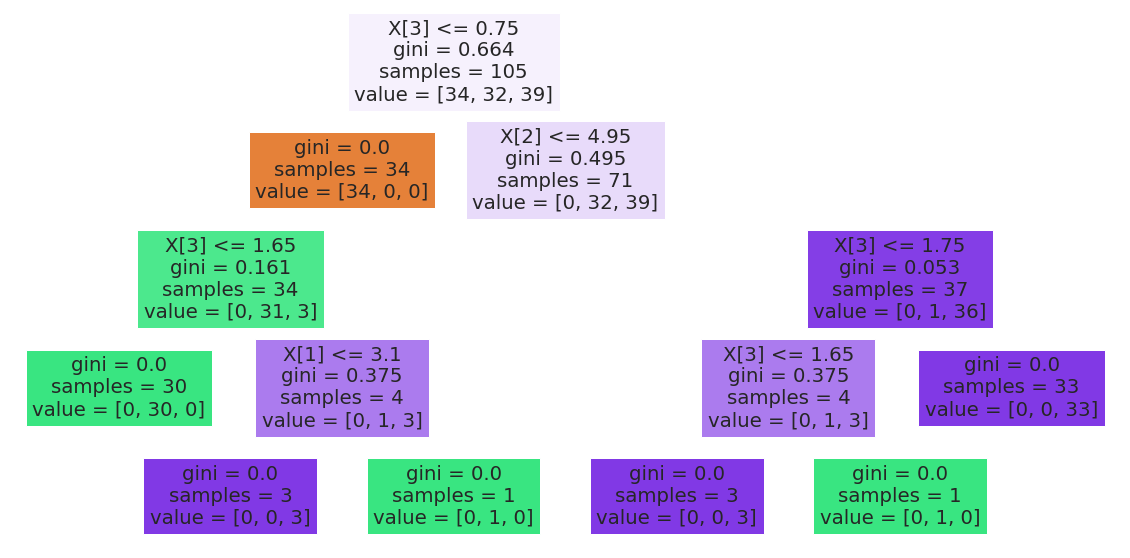

In [ ]:
iris_gini_cf = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize = (20,10))
plot_tree(iris_gini_cf, 
          filled=True)
plt.show()

In [ ]:
y_pred_gini = iris_gini_cf.predict(X_test)

ENTROPY DECISION TREE

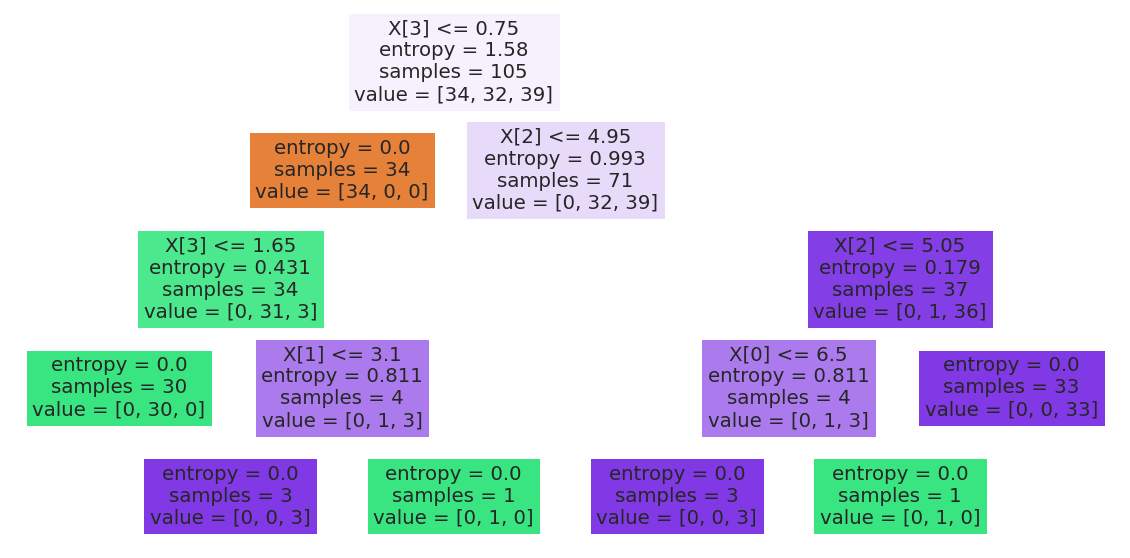

In [ ]:
iris_entropy_cf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
plt.figure(figsize = (20,10))
plot_tree(iris_entropy_cf, 
          filled=True)
plt.show()

In [ ]:
y_pred_entropy = iris_entropy_cf.predict(X_test)

In [ ]:
target_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
print("------------ Iris Dataset DecisionTree -------------")
print("Gini:")
print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini, target_names=target_names))
print("Entropy:")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy, target_names=target_names))

------------ Iris Dataset DecisionTree -------------
Gini:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Entropy:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



DECISION TREE WITH PARAMETER TUNING

In [ ]:
param_grid_desci = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
classifier_desci_p = DecisionTreeClassifier()
clf = GridSearchCV(classifier_desci_p, param_grid_desci)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

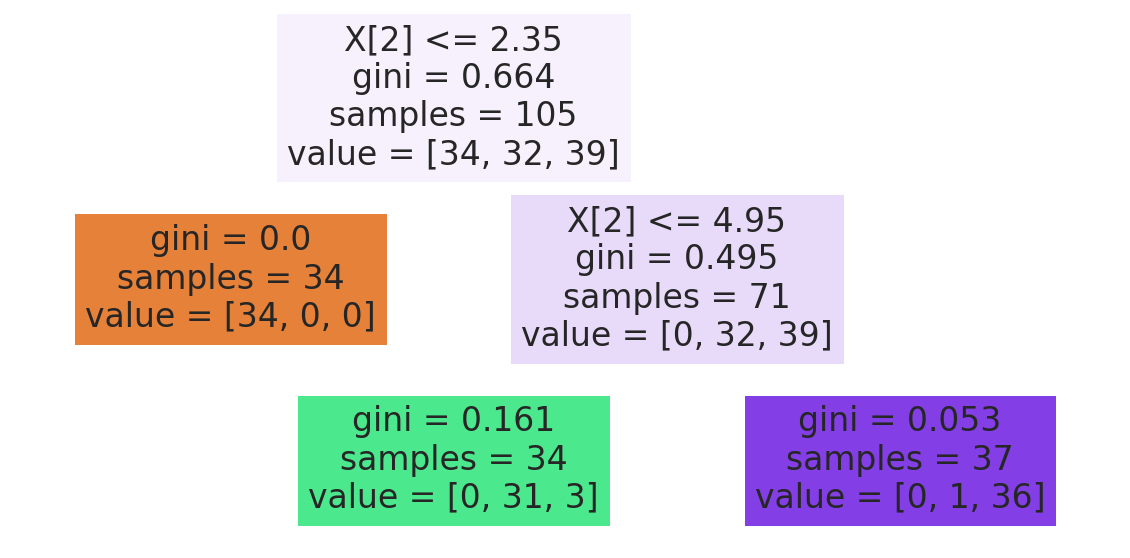

In [ ]:
plt.figure(figsize = (20,10))
plot_tree(clf.best_estimator_, 
          filled=True)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("------------ Iris Dataset DecisionTree Parameter-------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

------------ Iris Dataset DecisionTree Parameter-------------
[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.89      0.73      0.80        11

       accuracy                           0.91        45
      macro avg       0.91      0.89      0.90        45
   weighted avg       0.91      0.91      0.91        45



LOADING DIABETES DATASET

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
X,y=load_diabetes(return_X_y=True)

In [ ]:
df1 = pd.DataFrame(X, columns=["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"])
df2 = pd.DataFrame(y, columns=["Y"])

In [ ]:
diabetes = pd.merge(df1, df2, left_index=True, right_index=True)
print(diabetes.head())

        age       sex       bmi        bp  ...        s4        s5        s6      Y
0  0.038076  0.050680  0.061696  0.021872  ... -0.002592  0.019908 -0.017646  151.0
1 -0.001882 -0.044642 -0.051474 -0.026328  ... -0.039493 -0.068330 -0.092204   75.0
2  0.085299  0.050680  0.044451 -0.005671  ... -0.002592  0.002864 -0.025930  141.0
3 -0.089063 -0.044642 -0.011595 -0.036656  ...  0.034309  0.022692 -0.009362  206.0
4  0.005383 -0.044642 -0.036385  0.021872  ... -0.002592 -0.031991 -0.046641  135.0

[5 rows x 11 columns]


In [ ]:
diabetes['sex'].unique()

array([ 0.05068012, -0.04464164])

In [ ]:
diabetes.describe(include='all')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


USING 'SEX' COLUMN AS CLASSIFICATION COLUMN

In [ ]:
y=diabetes.iloc[:,1].values
X=diabetes.drop('sex', axis=1)
print(X.shape, y.shape)

(442, 10) (442,)


In [ ]:
X.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
y = le.fit_transform(y)

SPLITTING DATASET INTO TRAIN AND TEST

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

GAUSSIAN NAIVE BAYES

In [ ]:
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[48 26]
 [17 42]]
accuracy_Naive Bayes: 0.677
precision_Naive Bayes: 0.677
recall_Naive Bayes: 0.677
f1-score_Naive Bayes : 0.677


GAUSSIAN NAIVE BAYES WITH PARAMETER TUNING

In [ ]:
gaussian_nb_grid.fit(X_train, y_train)
Y_pred = gaussian_nb_grid.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.2s


Confusion matrix for Naive Bayes
 [[51 23]
 [18 41]]
accuracy_Naive Bayes: 0.692
precision_Naive Bayes: 0.692
recall_Naive Bayes: 0.692
f1-score_Naive Bayes : 0.692


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.4s finished


BERNOULLI NAIVE BAYES

In [ ]:
bernoulli.fit(X_train, y_train)
Y_pred = bernoulli.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[51 23]
 [14 45]]
accuracy_Naive Bayes: 0.722
precision_Naive Bayes: 0.722
recall_Naive Bayes: 0.722
f1-score_Naive Bayes : 0.722


BERNOULLI NAIVE BAYES WITH PARAMETER TUNING

In [ ]:
bernoulli_nb_grid.fit(X_train, y_train)
Y_pred = bernoulli_nb_grid.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Confusion matrix for Naive Bayes
 [[51 23]
 [14 45]]
accuracy_Naive Bayes: 0.722
precision_Naive Bayes: 0.722
recall_Naive Bayes: 0.722
f1-score_Naive Bayes : 0.722


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


SCALING REQUIRED FOR MULTINOMIAL NAIVE BAYES AS NEGATIVE VALUES CANNOT BE SUPPLIED.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

MULTINOMIAL NAIVE BAYES

In [ ]:
multinomial.fit(X_train, y_train)
Y_pred = multinomial.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[59 15]
 [23 36]]
accuracy_Naive Bayes: 0.714
precision_Naive Bayes: 0.714
recall_Naive Bayes: 0.714
f1-score_Naive Bayes : 0.714


MULTINOMIAL NAIVE BAYES WITH PARAMETER TUNING

In [ ]:
multinomial_nb_grid.fit(X_train, y_train)
Y_pred = multinomial_nb_grid.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Confusion matrix for Naive Bayes
 [[59 15]
 [23 36]]
accuracy_Naive Bayes: 0.714
precision_Naive Bayes: 0.714
recall_Naive Bayes: 0.714
f1-score_Naive Bayes : 0.714


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


GINI DECISION TREE

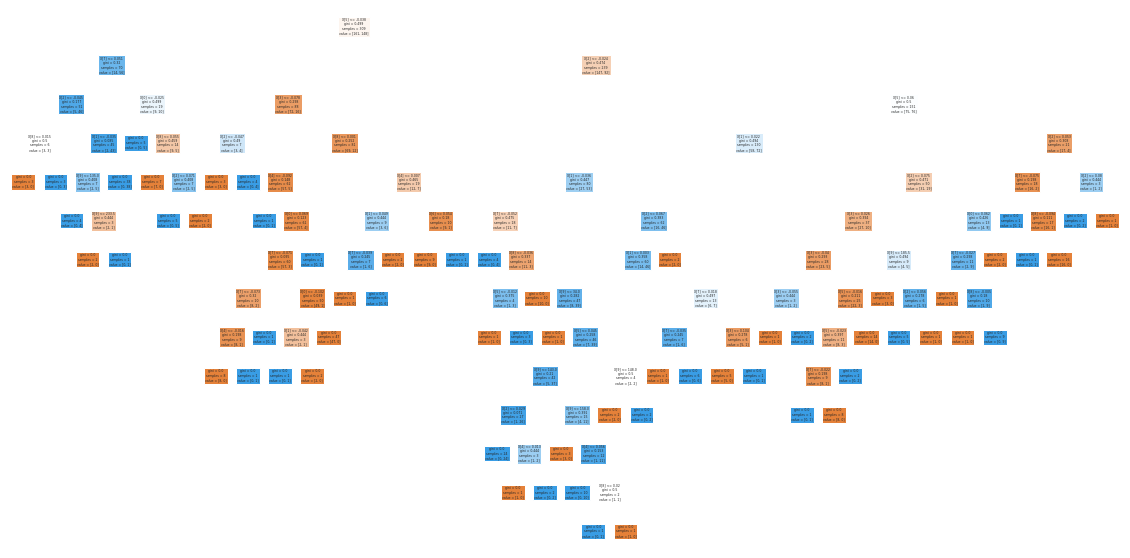

In [ ]:
diab_gini_cf = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize = (20,10))
plot_tree(diab_gini_cf, 
          filled=True)
plt.show()

In [ ]:
y_pred_gini = diab_gini_cf.predict(X_test)

ENTROPY DECISION TREE

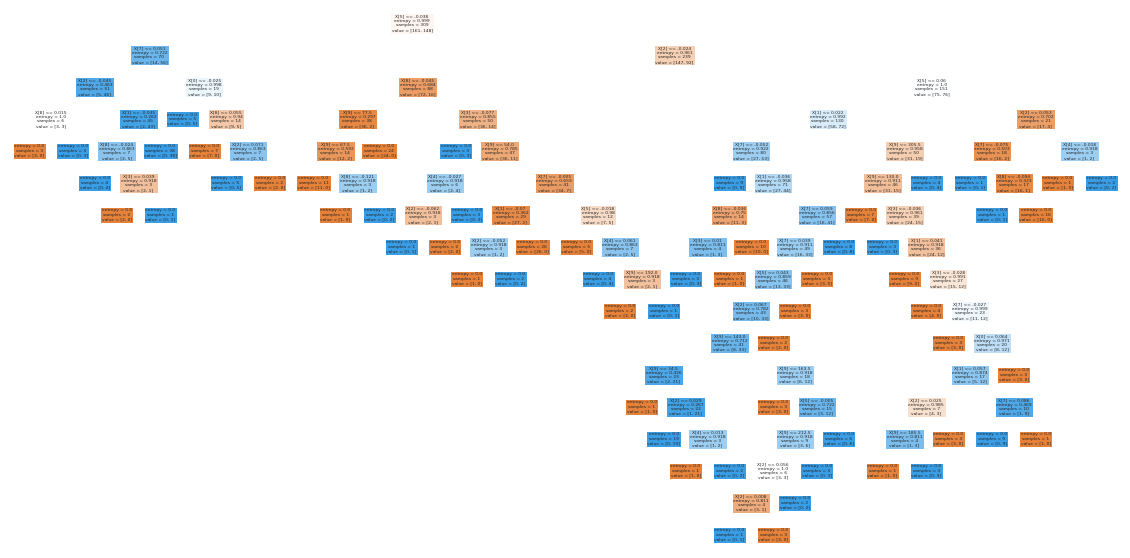

In [ ]:
diab_entropy_cf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
plt.figure(figsize = (20,10))
plot_tree(diab_entropy_cf, 
          filled=True)
plt.show()

In [ ]:
y_pred_entropy = diab_entropy_cf.predict(X_test)

In [ ]:
target_names = ["0", "1"]
print("------------ Diabetes Dataset DecisionTree -------------")
print("Gini:")
print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini, target_names=target_names))
print("Entropy:")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy, target_names=target_names))

------------ Diabetes Dataset DecisionTree -------------
Gini:
[[44 30]
 [21 38]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        74
           1       0.56      0.64      0.60        59

    accuracy                           0.62       133
   macro avg       0.62      0.62      0.62       133
weighted avg       0.62      0.62      0.62       133

Entropy:
[[41 33]
 [18 41]]
              precision    recall  f1-score   support

           0       0.69      0.55      0.62        74
           1       0.55      0.69      0.62        59

    accuracy                           0.62       133
   macro avg       0.62      0.62      0.62       133
weighted avg       0.63      0.62      0.62       133



DECISION TREE WITH PARAMETER TUNING

In [ ]:
classifier_desci_p = DecisionTreeClassifier()
clf = GridSearchCV(classifier_desci_p, param_grid_desci)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

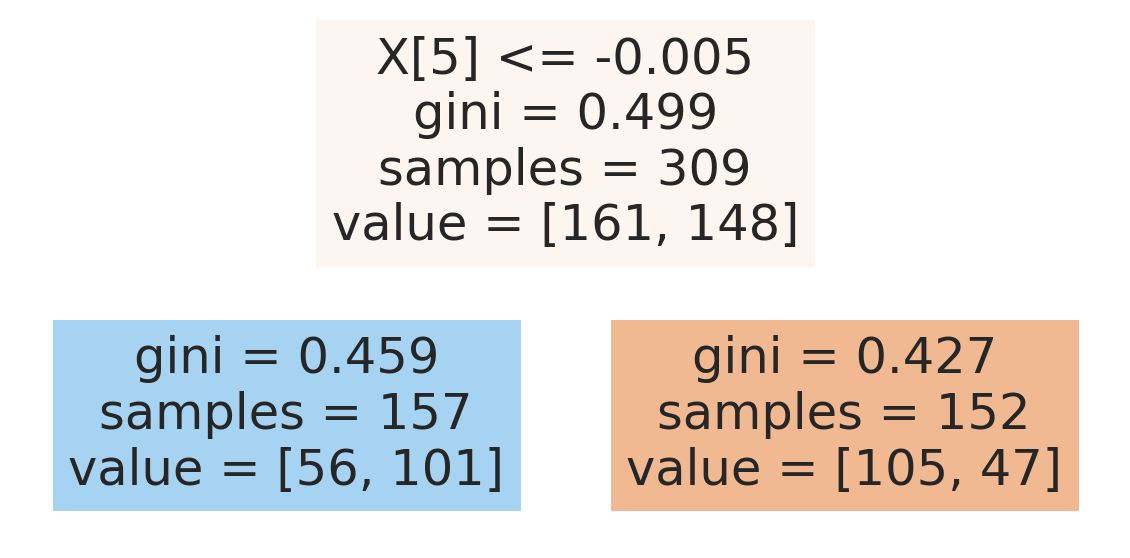

In [ ]:
plt.figure(figsize = (20,10))
plot_tree(clf.best_estimator_, 
          filled=True)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("------------ Diabetes Dataset DecisionTree Parameter-------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

------------ Diabetes Dataset DecisionTree Parameter-------------
[[47 27]
 [15 44]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69        74
           1       0.62      0.75      0.68        59

    accuracy                           0.68       133
   macro avg       0.69      0.69      0.68       133
weighted avg       0.70      0.68      0.68       133



LOADING BREAST CANCER DATASET

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
X,y=load_breast_cancer(return_X_y=True)

In [ ]:
X.shape

(569, 30)

In [ ]:
cancer = pd.DataFrame(X)
cancer.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


SPLITTING DATASET INTO TEST AND TRAIN

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

GAUSSIAN NAIVE BAYES

In [ ]:
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[ 57   6]
 [  7 101]]
accuracy_Naive Bayes: 0.924
precision_Naive Bayes: 0.924
recall_Naive Bayes: 0.924
f1-score_Naive Bayes : 0.924


GAUSSIAN NAIVE BAYES WITH PARAMETER TUNING

In [ ]:
gaussian_nb_grid.fit(X_train, y_train)
Y_pred = gaussian_nb_grid.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.8s


Confusion matrix for Naive Bayes
 [[ 57   6]
 [  7 101]]
accuracy_Naive Bayes: 0.924
precision_Naive Bayes: 0.924
recall_Naive Bayes: 0.924
f1-score_Naive Bayes : 0.924


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.6s finished


BERNOULLI NAIVE BAYES

In [ ]:
bernoulli.fit(X_train, y_train)
Y_pred = bernoulli.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[  0  63]
 [  0 108]]
accuracy_Naive Bayes: 0.632
precision_Naive Bayes: 0.632
recall_Naive Bayes: 0.632
f1-score_Naive Bayes : 0.632


BERNOULLI NAIVE BAYES WITH PARAMETER TUNING

In [ ]:
bernoulli_nb_grid.fit(X_train, y_train)
Y_pred = bernoulli_nb_grid.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Confusion matrix for Naive Bayes
 [[  0  63]
 [  0 108]]
accuracy_Naive Bayes: 0.632
precision_Naive Bayes: 0.632
recall_Naive Bayes: 0.632
f1-score_Naive Bayes : 0.632


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


MULTINOMIAL NAIVE BAYES

In [ ]:
multinomial.fit(X_train, y_train)
Y_pred = multinomial.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[ 48  15]
 [  2 106]]
accuracy_Naive Bayes: 0.901
precision_Naive Bayes: 0.901
recall_Naive Bayes: 0.901
f1-score_Naive Bayes : 0.901


MULTINOMIAL NAIVE BAYES WITH PARAMETER TUNING

In [ ]:
multinomial_nb_grid.fit(X_train, y_train)
Y_pred = multinomial_nb_grid.predict(X_test) 
cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Confusion matrix for Naive Bayes
 [[ 48  15]
 [  2 106]]
accuracy_Naive Bayes: 0.901
precision_Naive Bayes: 0.901
recall_Naive Bayes: 0.901
f1-score_Naive Bayes : 0.901


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


GINI DECISION TREE

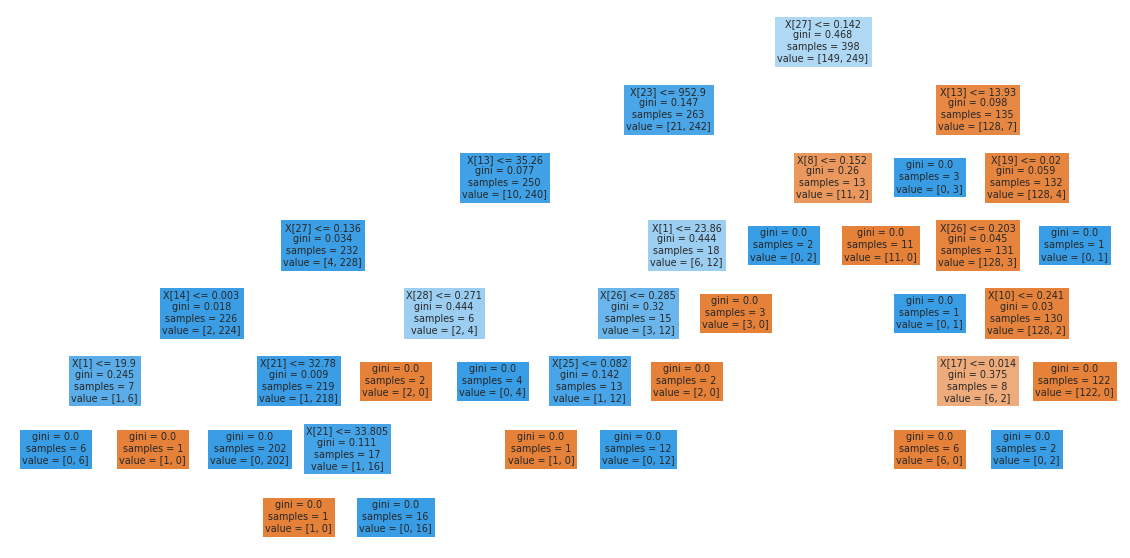

In [ ]:
bcw_gini_cf = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize = (20,10))
plot_tree(bcw_gini_cf, 
          filled=True)
plt.show()

In [ ]:
y_pred_gini = bcw_gini_cf.predict(X_test)

ENTROPY DECISION TREE

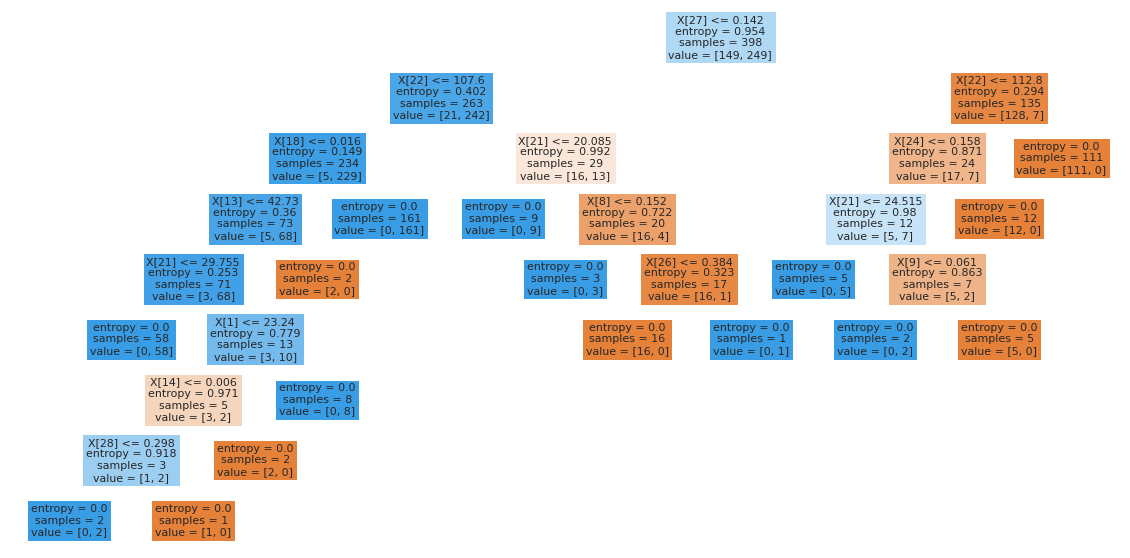

In [ ]:
bcw_entropy_cf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
plt.figure(figsize = (20,10))
plot_tree(bcw_entropy_cf, 
          filled=True)
plt.show()

In [ ]:
y_pred_entropy = bcw_entropy_cf.predict(X_test)

In [ ]:
print("------------ Breast Cancer Wisconsin Dataset DecisionTree -------------")
print("Gini:")
print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini, target_names=target_names))
print("Entropy:")
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy, target_names=target_names))

------------ Breast Cancer Wisconsin Dataset DecisionTree -------------
Gini:
[[59  4]
 [11 97]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        63
           1       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171

Entropy:
[[ 60   3]
 [  8 100]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        63
           1       0.97      0.93      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



DECISION TREE WITH PARAMETER TUNING

In [ ]:
classifier_desci_p = DecisionTreeClassifier()
clf = GridSearchCV(classifier_desci_p, param_grid_desci)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

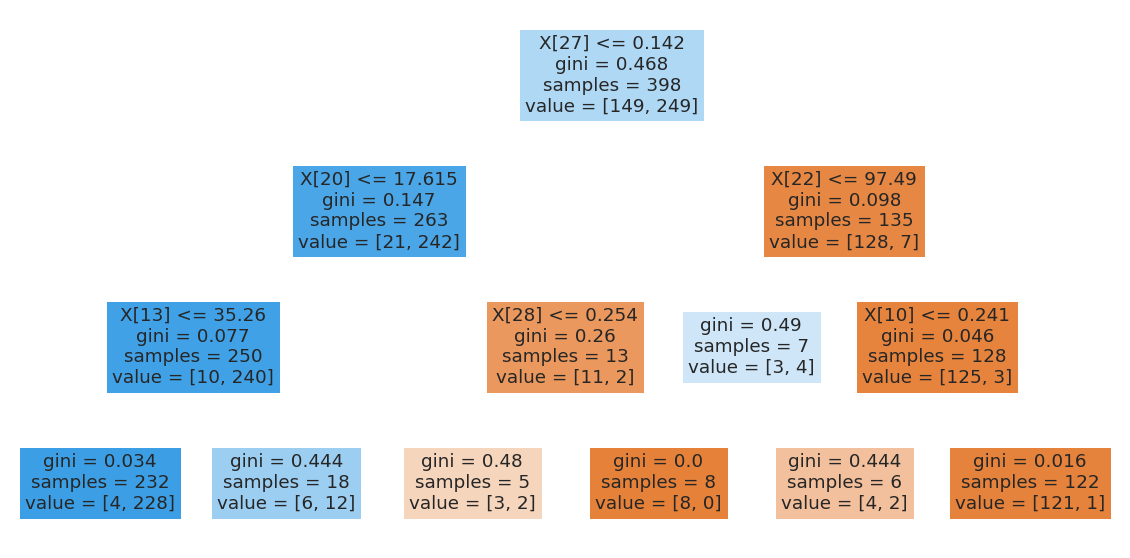

In [ ]:
plt.figure(figsize = (20,10))
plot_tree(clf.best_estimator_, 
          filled=True)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("------------ Breast Cancer Wisconsin Dataset DecisionTree Parameter-------------")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

------------ Breast Cancer Wisconsin Dataset DecisionTree Parameter-------------
[[ 59   4]
 [  5 103]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.96      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

